<!DOCTYPE html>
<html>

<head>
    <title>BV</title>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ol {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
        iframe {
            display: block;
            margin: auto;
        }
    </style>
</head>

<body>
    <div class="center">
        <img src="Logo_for_all/logo_round.png" alt="QHSO Logo" width="100">
    </div>
    <h1 style="text-align: center;">Unveiling the Bernstein-Vazirani Algorithm</h1>
    <p>In this notebook, we'll explore the Bernstein-Vazirani (BV) algorithm, a powerful quantum algorithm that can solve a specific type of problem exponentially faster than classical computers.</p>
    <h2>Problem Statement</h2>
    <p>Imagine you have a oracle box that takes an input of 'n' bits and produces a single bit as output. This oracle box has a hidden 'n-bit secret string' that determines the output. Your task is to unveil this hidden string using the least number of queries to the oracle box.</p>
    <h2>The Classical Approach</h2>
    <p>Classically, to unveil the secret string, you would need to make 'n' queries to the black box, one for each bit of the secret string. This is known as the <strong>brute-force</strong> approach, and it takes 'n' queries, which is linear in the problem size.</p>
    <h2>Enter the Bernstein-Vazirani Algorithm</h2>
    <p>Now, let's introduce the quantum magic! The Bernstein-Vazirani algorithm is a quantum algorithm that can unveil the secret string in a single query, regardless of the problem size 'n'. That's right; it's exponentially faster than the classical approach.<p>
    <h2>How Does it Work?</h2>
    <p>The BV algorithm leverages quantum parallelism and the power of superposition to unveil the secret string efficiently. Here's how it works:</p>
    <ol><li>Prepare 'n' qubits in the |0⟩ state. Add |1⟩ state to the 'n+1'th qubit</li><li>Apply a Hadamard gate (H-gate) to all 'n+1' qubits. This puts them in a superposition of all possible bit strings.</li><li>Query the black box (the 'oracle') to obtain the output, which is a result of bitwise multiplication (inner product) of the secret string with the input.</li><li>Apply another round of H-gates to the first 'n' qubits.</li><li>Measure the first 'n' qubits. The measurement result will be the hidden secret string!</li></ol>
    <h2>Let's recap Bernstein-Vazirani Algorithm in 2 minute</h2>
    <p>Here's a quick recap of the BV algorithm in 2 minutes:</p>
    <div class="center">
        <a href = "https://youtu.be/q_uHFQXCils?feature=shared"><img src="BV_stuffs/YouTube.png" alt="YouTube" width="250"></a>
    </div>
    <h2>Let's Witness Quantum Speed</h2>
    <p>Now, let's dive into quantum coding and witness the BV algorithm in action using Qiskit, a powerful quantum computing framework. We'll create a quantum circuit to unveil the secret string using the BV algorithm.</p>
</body>

</html>

1) Let's import the necessary libraries and initialize the quantum simulator.

In [1]:
from HiddenCode import generate_hidden_binary_string
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

2) From HiddenCode we get the secret string and store it in a variable called `hidden_code`.

In [2]:
# We check the length of the hidden binary string
hidden_code = generate_hidden_binary_string()

3) Let's measure the length of the secret string:

In [3]:
length = len(hidden_code)
print("The length of the binary string is:", length)

The length of the binary string is: 7


4) Let's create the Bernstein-Vazirani quantum circuit according to the length of the secret string:

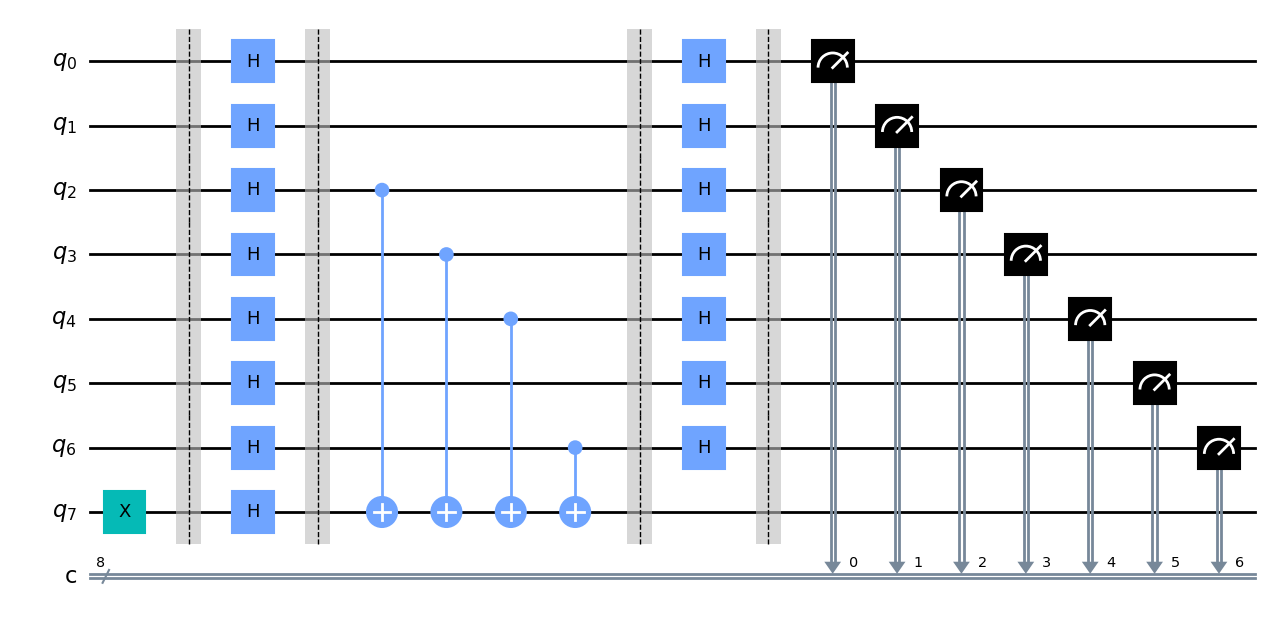

In [4]:
# We define our quantum circuit
qc = QuantumCircuit(length + 1, length + 1)

# We apply X-gate to the last qubit
qc.x(length)
qc.barrier()

# We apply Hadamard gates to all qubits
for i in range(length + 1):
    qc.h(i)

qc.barrier()
# We apply the oracle box
for i in range(length):
    if hidden_code[i] == '1':
        qc.cx(i, length)
qc.barrier()

# We apply Hadamard gates to all qubits except the last one
for i in range(length):
    qc.h(i)


qc.barrier()

# We measure all qubits except the last one
for i in range(length):
    qc.measure(i, i)

# We draw the circuit
qc.draw(output='mpl')


5) Let's mesure the circuit:

In [5]:
# We simulate the quantum circuit using the qasm simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)

6) Let's check the result if our circuit is correct or not:

Hidden binary string: 0011101
Output from the quantum circuit: 0011101


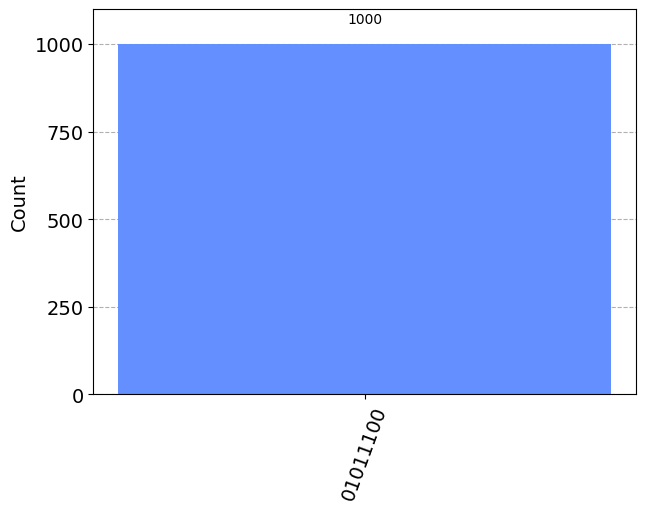

In [6]:
# We get the output of the first n+1 qubits
output = max(counts, key=counts.get)

# We delete the first bit from the output and reverse it
output = output[1:][::-1]
    
# We print the results
print("Hidden binary string:", hidden_code)
print("Output from the quantum circuit:", output)
plot_histogram(counts)

Here we can see that the result is correct. We have unveiled the secret string using the BV algorithm in a single query, which is exponentially faster than the classical approach.

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ul {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <h2>Applications of the BV Algorithm</h2>
    <p>The BV algorithm showcases the power of quantum computation and has applications in various fields:</p>
    <ul><li><strong>Cryptography:</strong> It demonstrates the vulnerability of classical cryptographic algorithms to quantum attacks.</li><li><strong>Speedup:</strong> It highlights the potential speedup of quantum algorithms over classical ones for specific problems.</li></ul>
</body>

</html>

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        h1, h2, h3, h4, h5, h6, p, ol {
            font-family: 'Jost', sans-serif;
        }
        h1{
            color: orange;
        }
        h2 {
            color: #8BC34A;
        }
        .center {
            text-align: center;
        }
    </style>
</head>

<body>
    <h2>Experiment and Explore</h2>
    <p>Now, it's your turn to explore the BV algorithm. Experiment with the provided code, create your own secret string problems, and witness the quantum advantage in action. This algorithm is just one example of how quantum computing can revolutionize the world of computation.</p>
</body>

</html>

<!DOCTYPE html>
<html>

<head>
    <link href="https://fonts.googleapis.com/css?family=Jost&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Jost', sans-serif;
        }
        .created-by {
         font-family: 'Jost', sans-serif;
         text-align: center;
         margin-top: 50px;
        }
        .created-by a {
            color: #fff;
            text-decoration: none;
        }
        .created-by a:hover {
            color: #8BC34A;
        }
    </style>
</head>

<body>
    <div class="created-by">
        Created by <a href="https://www.linkedin.com/in/abdullah-al-omar-galib-30b6b1258">Abdullah Al Omar Galib (Ahkatlio)</a>
    </div>
</body>

</html>